In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
transformation = [[0.60834549, 0.63667341], [0.40887718, 0.85253229]]
X, Y = make_blobs(n_samples=300, random_state=170)
X = np.dot(X, transformation)
X = X[Y == 0]
Y = Y[Y == 0]

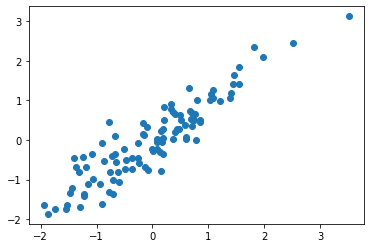

In [3]:
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)
plt.scatter(X[:, 0], X[:, 1]);

In [4]:
cov = np.cov(X.transpose())
cov

array([[1.01010101, 0.92729201],
       [0.92729201, 1.01010101]])

In [5]:
vals, vecs = np.linalg.eigh(cov)
vecs = vecs[:,np.argsort(vals)][::-1]
vals = vals[np.argsort(vals)][::-1]
print('vals', vals)
print('vecs', vecs)

vals [1.93739302 0.082809  ]
vecs [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [6]:
points = np.array([[0, 0], [0, 1], [1, 0], [0, -1], [-1, 0]])
new_points = []
for point in points:
    new_points.append(list(np.dot(cov, point.reshape(-1, 1)).reshape(1, -1)[0]))
new_points = np.array(new_points)
new_points

array([[ 0.        ,  0.        ],
       [ 0.92729201,  1.01010101],
       [ 1.01010101,  0.92729201],
       [-0.92729201, -1.01010101],
       [-1.01010101, -0.92729201]])

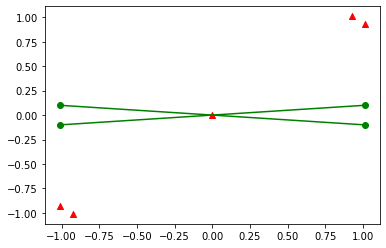

In [7]:
for i in range(0,2):
    eigen = np.array([
        [min(new_points[:, 0]), vecs[0][i] * -0.1 / vecs[1][i]],
        [max(new_points[:, 0]),  vecs[0][i] * 0.1 / vecs[1][i]]
    ])
    plt.plot(eigen[:, 0], eigen[:, 1], '-o', color='green')
plt.scatter(new_points[:, 0], new_points[:, 1], c='red', marker='^');

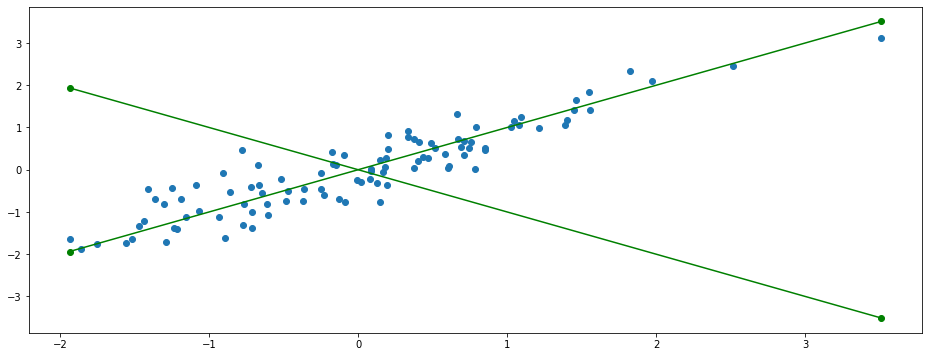

In [8]:
f, ax = plt.subplots(1, 1, figsize=(16, 6));
ax.scatter(X[:, 0], X[:, 1]);
for i in range(2):
    eigen = np.array([
        [min(X[:, 0]), vecs[0][i] * min(X[:, 0]) / vecs[1][i]],
        [max(X[:, 0]),  vecs[0][i] * max(X[:, 0]) / vecs[1][i]]
    ])
    plt.plot(eigen[:, 0], eigen[:, 1], '-o', color='green')